In [36]:
import pandas as pd

In [2]:
df_test=pd.read_csv("C:/Users/Anderson/Downloads/UNSW-NB15 - CSV Files/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_training-set.csv")
df_test=df_test.drop(['id'], axis=1)
df_train=pd.read_csv("C:/Users/Anderson/Downloads/UNSW-NB15 - CSV Files/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_testing-set.csv")
df_train=df_train.drop(['id'], axis=1)

df=pd.concat([df_train,df_test])

In [3]:
df.shape
df.head()

dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   sttl  ...    ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0   252  ...                   1               1             0           0   
1    62  ...                   1               2             0           0   
2    62  ...                   1               3             0           0   
3    62  ...                   1               3             1           1   
4   254  ...                   1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0           1           1                0      Normal   
1                 0           1           6                0      Normal   
2                 0           2           6                0      Normal   
3                 0           2           1                0      Normal   
4                 0           2          39                0      Normal   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 44 columns]

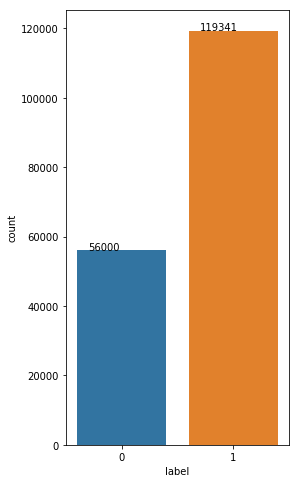

In [4]:
import seaborn as s
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(4,8))
ax=s.countplot(x='label',data=df_train )
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

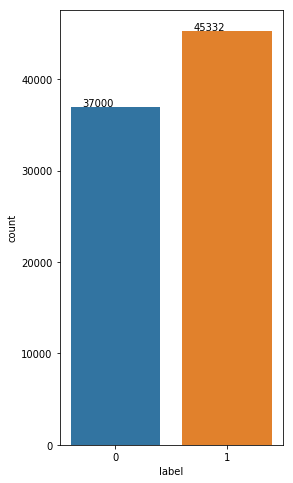

In [5]:
import seaborn as s
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(4,8))
ax=s.countplot(x='label',data=df_test )
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

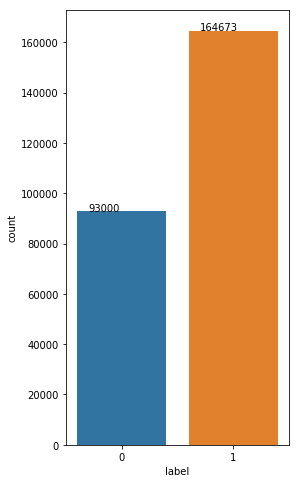

In [6]:
import seaborn as s
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(4,8))
ax=s.countplot(x='label',data=df )
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [25]:
s.pairplot(df, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='hist', markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None)

In [7]:
df=df.drop(['attack_cat'], axis=1)

In [8]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

df_categorical_values_enc=df.select_dtypes(include=['object']).apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())
# proto
proto=sorted(df.proto.unique())
string1 = 'Proto_'
proto_2=[string1 + x for x in proto]
# service
service=sorted(df.service.unique())
string2 = 'service_'
service_2=[string2 + x for x in service]
# state
state=sorted(df.state.unique())
string3 = 'state_'
state_2=[string3 + x for x in state]
# put together
dumcols=[]
#dumcols=''.join(proto_2 + service_2 + state_2)
dumcols.append(proto_2)
dumcols.append(service_2)
dumcols.append(state_2)
print(dumcols)

def flatten(l):
    try:
        return flatten(l[0]) + (flatten(l[1:]) if len(l) > 1 else []) if type(l) is list else [l]
    except IndexError:
        return []

dumcols=flatten(dumcols)
print(dumcols)
len(dumcols)

   proto  service  state
0    113        0      4
1    113        0      4
2    113        0      4
3    113        3      4
4    113        0      4
[['Proto_3pc', 'Proto_a/n', 'Proto_aes-sp3-d', 'Proto_any', 'Proto_argus', 'Proto_aris', 'Proto_arp', 'Proto_ax.25', 'Proto_bbn-rcc', 'Proto_bna', 'Proto_br-sat-mon', 'Proto_cbt', 'Proto_cftp', 'Proto_chaos', 'Proto_compaq-peer', 'Proto_cphb', 'Proto_cpnx', 'Proto_crtp', 'Proto_crudp', 'Proto_dcn', 'Proto_ddp', 'Proto_ddx', 'Proto_dgp', 'Proto_egp', 'Proto_eigrp', 'Proto_emcon', 'Proto_encap', 'Proto_etherip', 'Proto_fc', 'Proto_fire', 'Proto_ggp', 'Proto_gmtp', 'Proto_gre', 'Proto_hmp', 'Proto_i-nlsp', 'Proto_iatp', 'Proto_ib', 'Proto_icmp', 'Proto_idpr', 'Proto_idpr-cmtp', 'Proto_idrp', 'Proto_ifmp', 'Proto_igmp', 'Proto_igp', 'Proto_il', 'Proto_ip', 'Proto_ipcomp', 'Proto_ipcv', 'Proto_ipip', 'Proto_iplt', 'Proto_ipnip', 'Proto_ippc', 'Proto_ipv6', 'Proto_ipv6-frag', 'Proto_ipv6-no', 'Proto_ipv6-opts', 'Proto_ipv6-route', 'Proto_ipx-n-

157

In [9]:
enc = OneHotEncoder()
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)
df_cat_data.head()

Proto_3pc  Proto_a/n  Proto_aes-sp3-d  Proto_any  Proto_argus  Proto_aris  \
0        0.0        0.0              0.0        0.0          0.0         0.0   
1        0.0        0.0              0.0        0.0          0.0         0.0   
2        0.0        0.0              0.0        0.0          0.0         0.0   
3        0.0        0.0              0.0        0.0          0.0         0.0   
4        0.0        0.0              0.0        0.0          0.0         0.0   

   Proto_arp  Proto_ax.25  Proto_bbn-rcc  Proto_bna    ...     state_CLO  \
0        0.0          0.0            0.0        0.0    ...           0.0   
1        0.0          0.0            0.0        0.0    ...           0.0   
2        0.0          0.0            0.0        0.0    ...           0.0   
3        0.0          0.0            0.0        0.0    ...           0.0   
4        0.0          0.0            0.0        0.0    ...           0.0   

   state_CON  state_ECO  state_FIN  state_INT  state_PAR  state_REQ  \
0        0.0        0.0        1.0        0.0        0.0        0.0   
1        0.0        0.0        1.0        0.0        0.0        0.0   
2        0.0        0.0        1.0        0.0        0.0        0.0   
3        0.0        0.0        1.0        0.0        0.0        0.0   
4        0.0        0.0        1.0        0.0        0.0        0.0   

   state_RST  state_URN  state_no  
0        0.0        0.0       0.0  
1        0.0        0.0       0.0  
2        0.0        0.0       0.0  
3        0.0        0.0       0.0  
4        0.0        0.0       0.0  

[5 rows x 157 columns]

In [10]:
newdf=df.join(df_cat_data)
newdf.drop('state', axis=1, inplace=True)
newdf.drop('proto', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)
print(newdf.shape)

(257673, 197)


In [11]:
newdf.head()

dur  spkts  dpkts  sbytes  dbytes           rate  sttl  dttl  \
0  0.121478      6      4     258     172      74.087490   252   254   
0  0.000011      2      0     496       0   90909.090200   254     0   
1  0.649902     14     38     734   42014      78.473372    62   252   
1  0.000008      2      0    1762       0  125000.000300   254     0   
2  1.623129      8     16     364   13186      14.170161    62   252   

          sload          dload    ...     state_CLO  state_CON  state_ECO  \
0  1.415894e+04    8495.365234    ...           0.0        0.0        0.0   
0  1.803636e+08       0.000000    ...           0.0        0.0        0.0   
1  8.395112e+03  503571.312500    ...           0.0        0.0        0.0   
1  8.810000e+08       0.000000    ...           0.0        0.0        0.0   
2  1.572272e+03   60929.230470    ...           0.0        0.0        0.0   

   state_FIN  state_INT  state_PAR  state_REQ  state_RST  state_URN  state_no  
0        1.0        0.0        0.0        0.0        0.0        0.0       0.0  
0        1.0        0.0        0.0        0.0        0.0        0.0       0.0  
1        1.0        0.0        0.0        0.0        0.0        0.0       0.0  
1        1.0        0.0        0.0        0.0        0.0        0.0       0.0  
2        1.0        0.0        0.0        0.0        0.0        0.0       0.0  

[5 rows x 197 columns]

In [12]:
colnames=newdf.columns

In [13]:
X=newdf.drop(['label'], axis=1)
y=newdf.label

In [14]:
colNames=colnames

In [15]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2)
rfe = RFE(estimator=clf, n_features_to_select=25, step=1)
rfe.fit(X, y)
X_rfe=rfe.transform(X)
true=rfe.support_
rfecolindex=[i for i, x in enumerate(true) if x]
rfecolname=list(colNames[i] for i in rfecolindex)
print('Features selected for train:',rfecolname)
print()

Features selected for train: ['dur', 'sbytes', 'dbytes', 'rate', 'sttl', 'sload', 'dload', 'sloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'stcpb', 'dtcpb', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst', 'state_ECO']



In [16]:
from sklearn import preprocessing
scaler_train = preprocessing.StandardScaler().fit(X)
X=scaler_train.transform(X)

print(X.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
y_pred = classifier.predict(X_test)
print (y_pred)
print(y_test)

[1 1 1 ... 0 1 1]
61318     1
68559     1
162957    1
138930    1
15704     0
46325     0
159848    1
61595     1
102763    1
86981     1
158393    1
95581     1
124194    1
4760      1
12993     0
31744     0
2662      0
166805    1
3392      0
68416     0
107391    1
61674     1
122659    1
103092    0
19284     1
114810    0
49444     1
42626     0
65041     1
33087     0
         ..
30439     0
88457     1
281       0
42037     0
12678     0
59383     1
2181      1
60171     1
34131     0
102910    1
168678    1
108094    1
60499     1
27992     0
136737    1
117730    1
98314     1
55811     1
145509    1
115598    1
47127     0
17589     1
52929     1
138931    1
168082    1
148166    1
7383      1
152468    1
62774     1
38639     0
Name: label, Length: 85033, dtype: int64


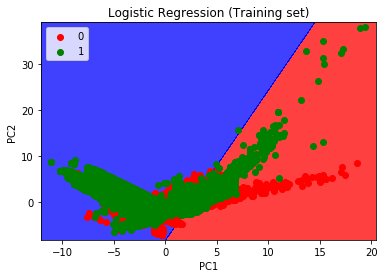

In [21]:
from matplotlib.colors import ListedColormap
import numpy as np
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                           max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                           bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0,
                           warm_start=False, class_weight=None)


In [23]:
clf.fit(X_train,y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
y_pred=clf.predict(X_test)

In [25]:
pd.crosstab(y_test, y_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks      0      1
Actual attacks                 
0                  24313   6231
1                   6953  47536

In [26]:
from sklearn.metrics import classification_report 

print("Model evaluation\n"+classification_report(y_test,y_pred))

from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(clf, X_test, y_test, cv=10, scoring='accuracy')
print(accuracy)
print("Accuracy: %0.9f (+/- %0.9f)" % (accuracy.mean(), accuracy.std() * 2))

Model evaluation
             precision    recall  f1-score   support

          0       0.78      0.80      0.79     30544
          1       0.88      0.87      0.88     54489

avg / total       0.85      0.84      0.85     85033

[0.83572437 0.8408984  0.84101599 0.83737065 0.83923321 0.8347642
 0.83817476 0.84370222 0.8367635  0.83509762]
Accuracy: 0.838274492 (+/- 0.005542848)


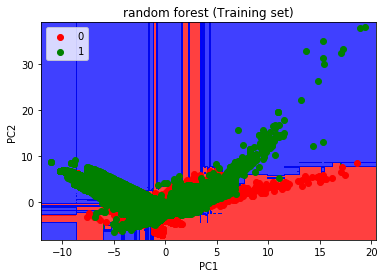

In [27]:
from matplotlib.colors import ListedColormap
import numpy as np
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('random forest (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [28]:
from sklearn import svm
clf = svm.SVC()

In [29]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [30]:
pd.crosstab(y_test, y_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks      0      1
Actual attacks                 
0                  23137   7407
1                   5705  48784

In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                           max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                           bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0,
                           warm_start=False, class_weight=None)


clf.fit(X_train,y_train)



y_pred=clf.predict(X_test)

pd.crosstab(y_test, y_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])


Predicted attacks      0      1
Actual attacks                 
0                  28614   1930
1                   2184  52305

In [35]:
from sklearn.metrics import classification_report 

print("Model evaluation\n"+classification_report(y_test,y_pred))

from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(clf, X_test, y_test, cv=10, scoring='accuracy')
print(accuracy)
print("Accuracy: %0.9f (+/- %0.9f)" % (accuracy.mean(), accuracy.std() * 2))

Model evaluation
             precision    recall  f1-score   support

          0       0.93      0.94      0.93     30544
          1       0.96      0.96      0.96     54489

avg / total       0.95      0.95      0.95     85033

[0.94226246 0.94367357 0.94332079 0.94414393 0.94343173 0.94590145
 0.94213807 0.94601905 0.94848877 0.94330746]
Accuracy: 0.944268728 (+/- 0.003741440)
